Assignment 3

Problem Statement :- Build CNN Model for Classification Of Flowers

Unzipping the dataset

In [7]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [10]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [11]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


Create Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Add Layers

In [13]:
model = Sequential()

Convolution

In [14]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

MaxPooling

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

Flatten

In [16]:
model.add(Flatten())

Dense

In [27]:
#1st hidden layer
model.add(Dense(200,activation='relu')) 
#2nd hidden layer
model.add(Dense(100,activation='relu')) 

Output

In [28]:
#Output layer
model.add(Dense(5,activation='softmax'))

Compile The Model

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit The Model

In [34]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
44/44 [==============================] - 39s 873ms/step - loss: 1.0626 - accuracy: 0.7287 - val_loss: 0.5209 - val_accuracy: 0.7934
Epoch 2/20
44/44 [==============================] - 39s 886ms/step - loss: 0.4248 - accuracy: 0.7876 - val_loss: 0.3785 - val_accuracy: 0.7978
Epoch 3/20
44/44 [==============================] - 39s 878ms/step - loss: 0.3893 - accuracy: 0.7948 - val_loss: 0.3319 - val_accuracy: 0.8110
Epoch 4/20
44/44 [==============================] - 41s 935ms/step - loss: 0.1953 - accuracy: 0.9402 - val_loss: 0.0339 - val_accuracy: 0.9949
Epoch 5/20
44/44 [==============================] - 42s 950ms/step - loss: 0.0727 - accuracy: 0.9831 - val_loss: 0.0330 - val_accuracy: 0.9921
Epoch 6/20
44/44 [==============================] - 38s 855ms/step - loss: 0.0704 - accuracy: 0.9808 - val_loss: 0.0318 - val_accuracy: 0.9928
Epoch 7/20
44/44 [==============================] - 38s 868ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 0.0143 - val_accuracy: 0.9977

Save The Model

In [35]:
model.save('flowers.h5')

Test The Model

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image

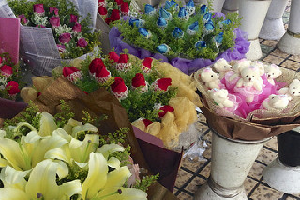

In [42]:
img= image.load_img('/content/flowers/rose/12562723334_a2e0a9e3c8_n.jpg',target_size=(200,300))
img

In [43]:
arr= image.img_to_array(img)
arr

array([[[174., 180., 204.],
        [171., 177., 193.],
        [170., 174., 183.],
        ...,
        [132., 133., 138.],
        [140., 141., 146.],
        [152., 151., 157.]],

       [[175., 180., 202.],
        [185., 191., 205.],
        [201., 206., 212.],
        ...,
        [137., 138., 143.],
        [143., 144., 149.],
        [153., 152., 158.]],

       [[205., 206., 224.],
        [199., 202., 211.],
        [205., 209., 210.],
        ...,
        [142., 143., 148.],
        [146., 147., 151.],
        [154., 153., 158.]],

       ...,

       [[223., 227., 194.],
        [222., 227., 187.],
        [221., 224., 177.],
        ...,
        [ 73.,  67.,  71.],
        [114., 106., 104.],
        [172., 165., 157.]],

       [[218., 223., 182.],
        [219., 223., 173.],
        [220., 221., 163.],
        ...,
        [ 66.,  65.,  71.],
        [ 54.,  53.,  59.],
        [ 55.,  56.,  60.]],

       [[227., 230., 187.],
        [222., 224., 174.],
        [219., 2